In [3]:
import numpy as np
import matplotlib.pyplot as plt


def smooth_data(data, method='moving_average', window_size=50, alpha=0.1):
    """
    Smooths the input data using different methods.

    Parameters:
    - data: numpy array of data points
    - method: 'moving_average' (default) or 'exponential'
    - window_size: window size for moving average
    - alpha: smoothing factor for exponential smoothing

    Returns:
    - Smoothed data array
    """
    if method == 'moving_average':
        return np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    elif method == 'exponential':
        smoothed_data = np.zeros_like(data)
        smoothed_data[0] = data[0]
        for t in range(1, len(data)):
            smoothed_data[t] = alpha * data[t] + (1 - alpha) * smoothed_data[t - 1]
        return smoothed_data
    else:
        raise ValueError("Invalid smoothing method. Choose 'moving_average' or 'exponential'")


def plot_smoothed_npy(file_path, method='moving_average', window_size=50, alpha=0.1):
    """
    Loads a .npy file, smooths the data, and plots the results.

    Parameters:
    - file_path: Path to the .npy file
    - method: Smoothing method ('moving_average' or 'exponential')
    - window_size: Window size for moving average smoothing
    - alpha: Smoothing factor for exponential smoothing
    """
    # Load data
    data = np.fromfile(file_path)

    # Smooth data
    smoothed_data = smooth_data(data, method=method, window_size=window_size, alpha=alpha)

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(data, alpha=0.3, label="Original Data")
    plt.plot(range(len(smoothed_data)), smoothed_data, label=f"Smoothed ({method})", color='red')
    plt.xlabel("Episode")
    plt.ylabel("Value")
    plt.title(f"Smoothed Data ({method})")
    plt.legend()
    plt.show()

# Example usage:
# plot_smoothed_npy("path_to_your_file.npy", method='exponential', alpha=0.1)

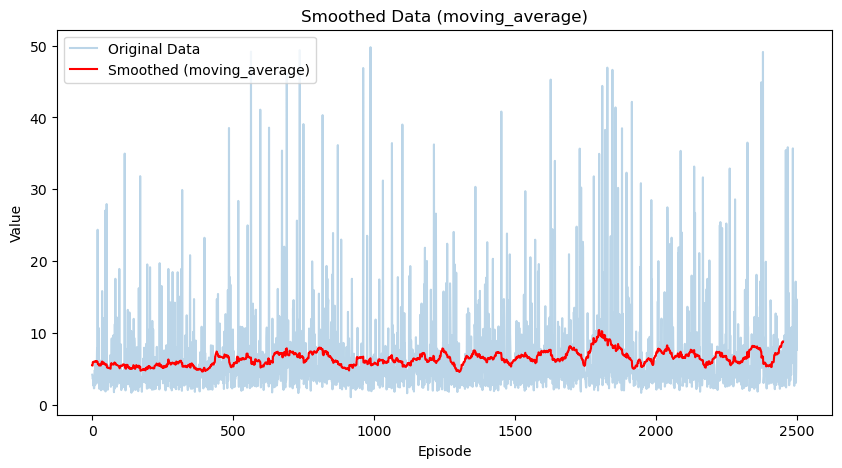

In [8]:
plot_smoothed_npy("rewards_per_episode_2500.npy", method='moving_average', window_size=50)

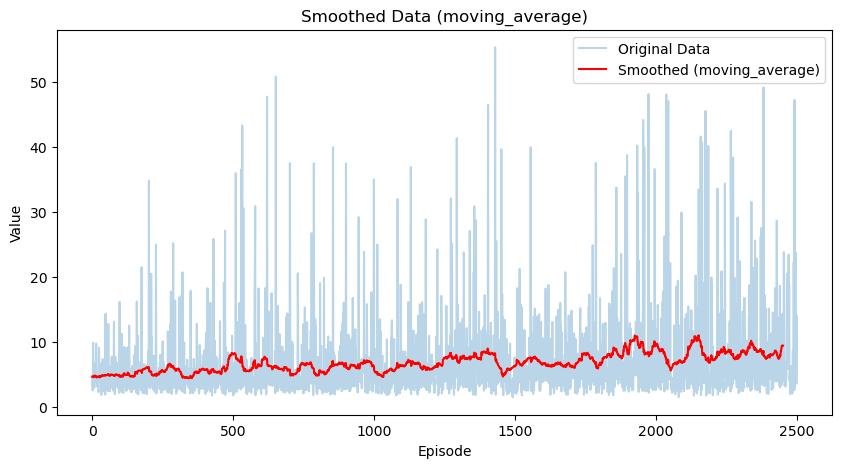

In [12]:
plot_smoothed_npy("rewards_per_episode_2500-5000.npy", method='moving_average', window_size=50)

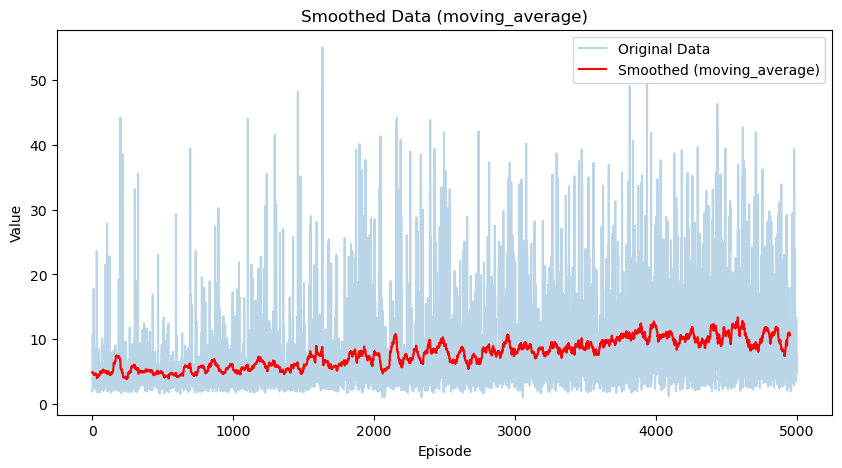

In [16]:
plot_smoothed_npy("rewards_per_episode_5000.npy", method='moving_average', window_size=50)

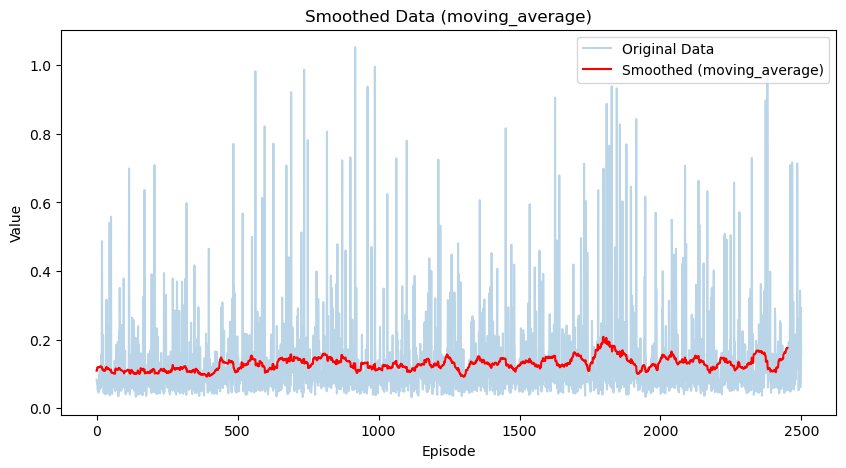

In [6]:
plot_smoothed_npy("rps_per_episode_2500.npy", method='moving_average', window_size=50)

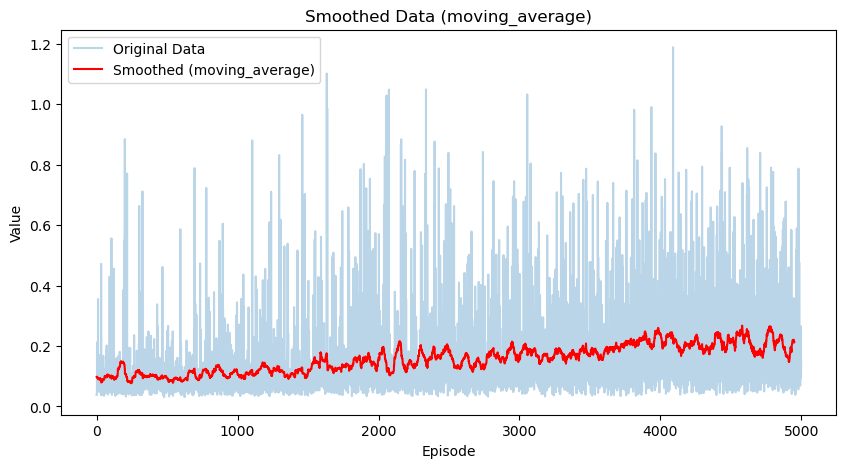

In [9]:
plot_smoothed_npy("rps_per_episode_5000.npy", method='moving_average', window_size=50)

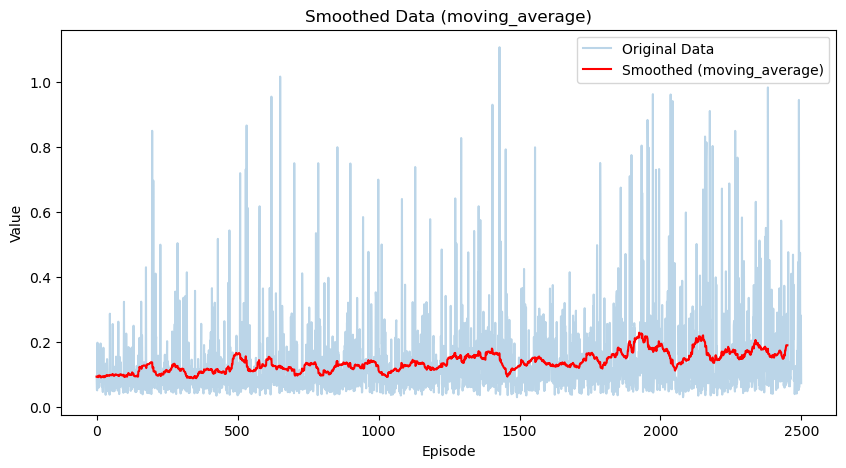

In [13]:
plot_smoothed_npy("rps_per_episode_2500-5000.npy", method='moving_average', window_size=50)